In [1]:
#데이터 import
from tensorflow.keras.datasets import mnist

#원핫인코딩
from tensorflow.keras.utils import to_categorical

#분석 기본 라이브러리
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape
#데이터가 6만개 28,28 2차원으로 되어있다고 했었나..

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

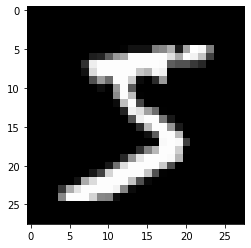

In [5]:
plt.imshow(X_train[0], cmap="gray")

In [6]:
#데이터가 몇개씩 있는지 확인
# 0 : 5923, 1: 6742
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [7]:
#X데이터 전처리
#3차원데이터를 2차원이터로

In [8]:
# X_train = X_train[:20000]
# y_test = y_test[:20000]

In [9]:
X_train.shape, X_train[0].shape

((60000, 28, 28), (28, 28))

In [10]:
#reshape 차원수를 바꾸는 것
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [11]:
X_train.shape, X_train[0].shape

((60000, 784), (784,))

In [12]:
### y데이터 전처리
### 원핫 인코딩

In [13]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [14]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [15]:
print(Y_train.shape)
print(Y_train[:3])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 딥러닝 모델 생성

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [25]:
model = Sequential()

#은닉층1
model.add(Dense(units=64,
                input_dim=784,
                activation="sigmoid"))

#은닉층2
model.add(Dense(units=128,
                activation="sigmoid"))

#은닉층3
model.add(Dense(units=128,
                activation="sigmoid"))

#출력층
model.add(Dense(units=10,
               activation="softmax"))


sgd = optimizers.SGD(lr=0.001) # 0~1 사이의 값
model.compile(loss="categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

In [26]:
#학습 validation_data는 검증할수 있는 데이터
hist = model.fit(X_train,Y_train,epochs=20,
          validation_data=(X_test,Y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3090 - accuracy: 0.1207 - val_loss: 2.2896 - val_accuracy: 0.1140
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2834 - accuracy: 0.1439 - val_loss: 2.2754 - val_accuracy: 0.1147
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2693 - accuracy: 0.1562 - val_loss: 2.2608 - val_accuracy: 0.2311
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2541 - accuracy: 0.2544 - val_loss: 2.2439 - val_accuracy: 0.2837
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2367 - accuracy: 0.3431 - val_loss: 2.2254 - val_accuracy: 0.3195
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2167 - accuracy: 0.4031 - val_loss: 2.2036 - val_accuracy: 0.3553
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1933 - accuracy: 0.4439 - val_loss: 2.1776 - val_accuracy:

In [47]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

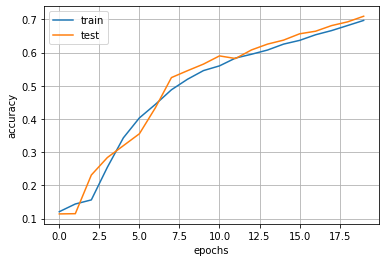

In [30]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

In [32]:
### 가중치 초기화

In [33]:
model = Sequential()

#은닉층1
model.add(Dense(units=64,
                input_dim=784,
                activation="sigmoid",
                kernel_initializer="he_normal"))

#은닉층2
model.add(Dense(units=128,
                activation="sigmoid"))

#은닉층3
model.add(Dense(units=128,
                activation="sigmoid"))

#출력층
model.add(Dense(units=10,
               activation="softmax"))


sgd = optimizers.SGD(lr=0.001) # 0~1 사이의 값
model.compile(loss="categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

hist = model.fit(X_train,Y_train,epochs=20,
          validation_data=(X_test,Y_test), verbose=0)

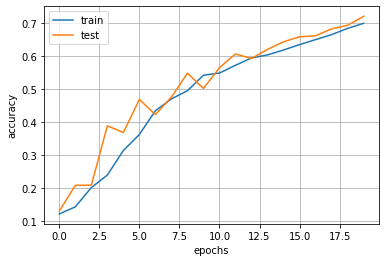

In [34]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

In [39]:
#활성화 함수 sigmoid -> relu

In [42]:
model = Sequential()

#은닉층1
model.add(Dense(units=64,
                input_dim=784,
                activation="relu",
                kernel_initializer="he_normal"))

#은닉층2
model.add(Dense(units=128,
                activation="relu"))

#은닉층3
model.add(Dense(units=128,
                activation="relu"))

#출력층
model.add(Dense(units=10,
               activation="softmax"))


sgd = optimizers.SGD(lr=0.001) # 0~1 사이의 값
model.compile(loss="categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

hist = model.fit(X_train,Y_train,epochs=20,
          validation_data=(X_test,Y_test), verbose=0)

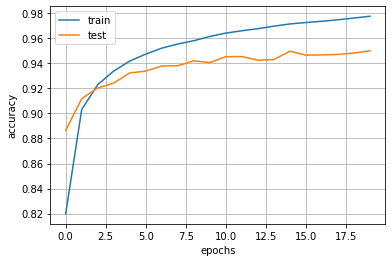

In [43]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

In [44]:
#optimizer 변경

In [45]:
model = Sequential()

#은닉층1
model.add(Dense(units=64,
                input_dim=784,
                activation="relu",
                kernel_initializer="he_normal"))

#은닉층2
model.add(Dense(units=128,
                activation="relu"))

#은닉층3
model.add(Dense(units=128,
                activation="relu"))

#출력층
model.add(Dense(units=10,
               activation="softmax"))


sgd = optimizers.SGD(lr=0.001) # 0~1 사이의 값
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

hist = model.fit(X_train,Y_train,epochs=20,
          validation_data=(X_test,Y_test), verbose=0)

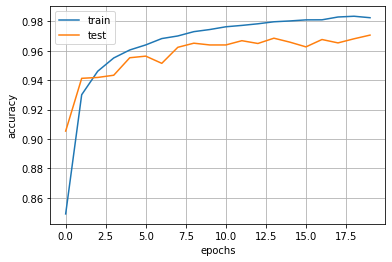

In [46]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()